In [140]:
# dependencies
import pandas as pd
import random
import matplotlib.pyplot as plt

In [78]:
# read csv and turn into DF
nutrients_df = pd.read_csv("SuperTrackerNutrients.csv")
nutrients_df

,Food_Item_ID,foodcode,modcode,Food_Category,foodname,_203 Protein (g),_204 Total Fat (g),_205 Carbohydrate (g),_208 Energy (kcal),_221 Alcohol (g),...,_418 Vitamin B-12 (mcg),"_421 Choline, total (mg)",_430 Vitamin K (phylloquinone)(mcg),_431 Folic acid (mcg),"_432 Folate, food (mcg)","_435 Folate, DFE (mcg_DFE)","_573 Vitamin E, added (mg)","_578 Vitamin B-12, added (mcg)",_601 Cholesterol (mg),"_606 Fatty acids, total saturated (g)"
0,6389,26153170,0,Proteins,"Tuna, fresh, dried",76.2500,1.5300,0.0000,341.0,0.0,...,5.8498,203.0998,0.3000,0.0,6.0,6.0,0.0,0.0,122.0,0.5380
1,6541,95201200,0,Proteins,EAS whey protein powder,66.6700,5.1299,17.9499,385.0,0.0,...,2.2700,81.5999,0.5000,200.0,0.0,340.0,0.0,0.0,205.0,2.5640
2,962,26137170,0,Proteins,"Salmon, dried",64.0600,13.7500,0.0000,397.0,0.0,...,11.6700,295.6000,1.2000,0.0,11.0,11.0,0.0,0.0,144.0,2.5310
3,864,26109170,0,Proteins,"Cod, dried, salted",62.8200,2.3700,0.0000,290.0,0.0,...,10.0000,291.3000,0.4000,0.0,25.0,25.0,0.0,0.0,152.0,0.4620
4,565,22709010,0,Proteins,"Pork, skin, deep-fried (pork rinds)",61.2999,31.3000,0.0000,544.0,0.0,...,0.6400,164.5000,0.0000,0.0,0.0,0.0,0.0,0.0,95.0,11.3698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6449,4669,81203100,0,NaN,"Shortening, vegetable",0.0000,99.9698,0.0000,884.0,0.0,...,0.0000,0.2000,53.2000,0.0,0.0,0.0,0.0,0.0,0.0,24.9800
6450,4683,82103000,0,NaN,"Oil, cottonseed",0.0000,100.0000,0.0000,884.0,0.0,...,0.0000,0.2000,24.6999,0.0,0.0,0.0,0.0,0.0,0.0,25.8998
6451,4668,81202000,0,Fats,Lard,0.0000,100.0000,0.0000,902.0,0.0,...,0.0000,49.7000,0.0000,0.0,0.0,0.0,0.0,0.0,95.0,39.2000
6452,6395,81203200,0,NaN,"Shortening, animal",0.0000,100.0000,0.0000,902.0,0.0,...,0.0000,49.7000,0.0000,0.0,0.0,0.0,0.0,0.0,95.0,39.2000


In [79]:
# run a count to test data
nutrients_df["Food_Category"].value_counts()

Carbs       400
Proteins    400
Fats          3
Name: Food_Category, dtype: int64

In [80]:
# pare down columns
nutrients_df = nutrients_df[["Food_Item_ID","foodcode","Food_Category","foodname","_203 Protein (g)",
                      "_204 Total Fat (g)","_205 Carbohydrate (g)","_208 Energy (kcal)","_601 Cholesterol (mg)",
                      "_606 Fatty acids, total saturated (g)"]]

# rename columns
nutrients_df = nutrients_df.rename(columns={"Food_Item_ID":"Food Item ID",
                            "foodcode":"Food Code",
                            "Food_Category":"Category",
                            "foodname":"Food",
                            "_203 Protein (g)":"Proteins (g)",
                            "_204 Total Fat (g)":"Fats (g)",
                            "_205 Carbohydrate (g)":"Carbs (g)",
                            "_208 Energy (kcal)":"Calories",
                            "_601 Cholesterol (mg)":"Cholesterol",
                            "_606 Fatty acids, total saturated (g)":"Saturated Fats (g)"})
# print DF
nutrients_df

,Food Item ID,Food Code,Category,Food,Proteins (g),Fats (g),Carbs (g),Calories,Cholesterol,Saturated Fats (g)
0,6389,26153170,Proteins,"Tuna, fresh, dried",76.2500,1.5300,0.0000,341.0,122.0,0.5380
1,6541,95201200,Proteins,EAS whey protein powder,66.6700,5.1299,17.9499,385.0,205.0,2.5640
2,962,26137170,Proteins,"Salmon, dried",64.0600,13.7500,0.0000,397.0,144.0,2.5310
3,864,26109170,Proteins,"Cod, dried, salted",62.8200,2.3700,0.0000,290.0,152.0,0.4620
4,565,22709010,Proteins,"Pork, skin, deep-fried (pork rinds)",61.2999,31.3000,0.0000,544.0,95.0,11.3698
...,...,...,...,...,...,...,...,...,...,...
6449,4669,81203100,NaN,"Shortening, vegetable",0.0000,99.9698,0.0000,884.0,0.0,24.9800
6450,4683,82103000,NaN,"Oil, cottonseed",0.0000,100.0000,0.0000,884.0,0.0,25.8998
6451,4668,81202000,Fats,Lard,0.0000,100.0000,0.0000,902.0,95.0,39.2000
6452,6395,81203200,NaN,"Shortening, animal",0.0000,100.0000,0.0000,902.0,95.0,39.2000


In [104]:
# create new DFs for each food category
carbs_df = nutrients_df[nutrients_df["Category"] == "Carbs"]
proteins_df = nutrients_df[nutrients_df["Category"] == "Proteins"]
fats_df = nutrients_df[nutrients_df["Category"] == "Fats"]

,Food Item ID,Food Code,Category,Food,Proteins (g),Fats (g),Carbs (g),Calories,Cholesterol,Saturated Fats (g)
4932,3532,63105010,Fats,"Avocado, raw",2.0,14.66,8.5298,160.0,0.0,2.1259
6443,4685,82104000,Fats,"Oil, olive",0.0,100.00,0.0000,884.0,0.0,13.8080
6451,4668,81202000,Fats,Lard,0.0,100.00,0.0000,902.0,95.0,39.2000


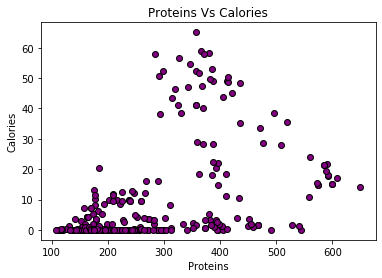

In [141]:
plt.scatter(proteins_df["Calories"],proteins_df["Carbs (g)"],edgecolors="black",facecolors="purple")
plt.title("Proteins Vs Calories")
plt.xlabel("Proteins")
plt.ylabel("Calories")
plt.show()

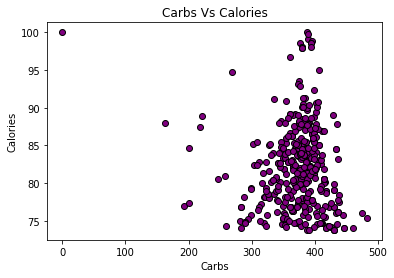

In [142]:
plt.scatter(carbs_df["Calories"],carbs_df["Carbs (g)"],edgecolors="black",facecolors="purple")
plt.title("Carbs Vs Calories")
plt.xlabel("Carbs")
plt.ylabel("Calories")
plt.show()

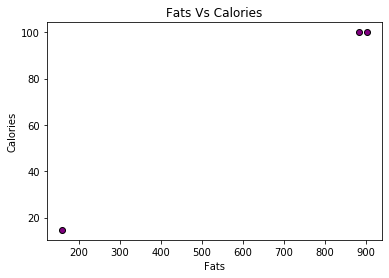

In [143]:
plt.scatter(fats_df["Calories"],fats_df["Fats (g)"],edgecolors="black",facecolors="purple")
plt.title("Fats Vs Calories")
plt.xlabel("Fats")
plt.ylabel("Calories")
plt.show()

In [82]:
# select random row from each DF (this snippet was for testing; keeping this original code for reference)
random_carb = nutrients_df[nutrients_df["Category"] == "Carbs"].sample(n=1)
random_protein = nutrients_df[nutrients_df["Category"] == "Proteins"].sample(n=1)
random_fats = nutrients_df[nutrients_df["Category"] == "Fats"].sample(n=1)

,Food Item ID,Food Code,Category,Food,Proteins (g),Fats (g),Carbs (g),Calories,Cholesterol,Saturated Fats (g)
383,5372,41108999,Proteins,"Mung beans, dry",23.8678,1.292,65.1098,357.0,0.0,0.3944


In [145]:
# uses the same code as above but renames variables to keep original DFs intact
# this section runs a loop through each DF and selects a random food item based on food category
random_carb2 = nutrients_df[nutrients_df["Category"] == "Carbs"].sample(n=1)
random_protein2 = nutrients_df[nutrients_df["Category"] == "Proteins"].sample(n=1)
random_fats2 = nutrients_df[nutrients_df["Category"] == "Fats"].sample(n=1)

# loop for carbs DF
for i, row in random_carb2.iterrows():
    if row["Category"] == "Carbs":
        a = row["Food"]
        b = row["Proteins (g)"]
        c = row["Fats (g)"]
        d = row["Carbs (g)"]
        e = row["Calories"]

# loop for proteins df
for i, row in random_protein2.iterrows():
    if row["Category"] == "Proteins":
        a1 = row["Food"]
        b1 = row["Proteins (g)"]
        c1 = row["Fats (g)"]
        d1 = row["Carbs (g)"]
        e1 = row["Calories"]
    
# loop for fats df
for i, row in random_fats2.iterrows():
    if row["Category"] == "Fats":
        a2 = row["Food"]
        b2 = row["Proteins (g)"]
        c2 = row["Fats (g)"]
        d2 = row["Carbs (g)"]
        e2 = row["Calories"]  

# creates a dictionary to populate random selections from above code
meal = {"Food":[a,a1,a2],
         "Proteins (g)":[b,b1,b2],
         "Fats":[c,c1,c2],
         "Carbs":[d,d1,d2],
         "Calories":[e,e1,e2]
          }

# creates new DF from the above dictionary
meal_df = pd.DataFrame(meal)
meal_df

,Food,Proteins (g),Fats,Carbs,Calories
0,Carob powder or flour,4.62,0.6500,88.8799,222.0
1,"Pork, chop, fried, lean and fat eaten",28.44,8.0998,0.0000,192.0
2,"Oil, olive",0.00,100.0000,0.0000,884.0


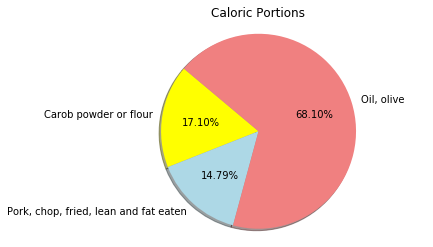

In [146]:
food = [meal_df["Food"].iloc[0], meal_df["Food"].iloc[1], meal_df["Food"].iloc[2]]
calories = [meal_df["Calories"].iloc[0], meal_df["Calories"].iloc[1], meal_df["Calories"].iloc[2]]
colors = ["yellow","lightblue","lightcoral"]
plt.pie(calories, labels=food, colors=colors,autopct="%.2f%%",shadow=True, startangle=140)
plt.title("Caloric Portions")
plt.axis("equal")
plt.show()